<a href="https://colab.research.google.com/github/quantwav/Project-dsff/blob/main/00_Predict_Day_%26_Hour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np

from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [ ]:
df_last = (
    pd.read_csv('df_last.csv')
)
df_last

Crime  PRCP  TMAX  TMIN  dc_dist_2  dc_dist_3  dc_dist_4  dc_dist_5  \
0            1  0.14  45.0  36.0          0          0          0          0   
1            1  0.14  45.0  36.0          0          0          0          0   
2            1  0.14  45.0  36.0          0          0          0          0   
3            1  0.14  45.0  36.0          0          0          0          0   
4            1  0.14  45.0  36.0          0          0          0          0   
...        ...   ...   ...   ...        ...        ...        ...        ...   
2456155      0  0.00  54.0  34.0          0          0          0          0   
2456156      0  0.00  54.0  34.0          0          1          0          0   
2456157      0  0.00  54.0  34.0          0          0          0          0   
2456158      0  0.00  54.0  34.0          0          0          0          0   
2456159      0  0.00  54.0  34.0          0          0          0          1   

         dc_dist_6  dc_dist_7  ...  Hour_14  Hour_15  Hour_16  Hour_17  \
0                0          0  ...      0.0      0.0      0.0      1.0   
1                0          0  ...      0.0      0.0      0.0      0.0   
2                0          0  ...      0.0      0.0      0.0      0.0   
3                0          0  ...      0.0      0.0      0.0      0.0   
4                0          0  ...      0.0      0.0      0.0      0.0   
...            ...        ...  ...      ...      ...      ...      ...   
2456155          0          0  ...      0.0      0.0      0.0      0.0   
2456156          0          0  ...      0.0      0.0      0.0      0.0   
2456157          0          0  ...      0.0      0.0      0.0      0.0   
2456158          0          1  ...      0.0      0.0      0.0      0.0   
2456159          0          0  ...      0.0      0.0      0.0      0.0   

         Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  Hour_23  
0            0.0      0.0      0.0      0.0      0.0      0.0  
1            1.0      0.0      0.0      0.0      0.0      0.0  
2            0.0      0.0      0.0      0.0      1.0      0.0  
3            0.0      0.0      0.0      0.0      0.0      0.0  
4            1.0      0.0      0.0      0.0      0.0      0.0  
...          ...      ...      ...      ...      ...      ...  
2456155      0.0      0.0      0.0      0.0      0.0      1.0  
2456156      1.0      0.0      0.0      0.0      0.0      0.0  
2456157      0.0      0.0      0.0      0.0      0.0      0.0  
2456158      0.0      0.0      0.0      0.0      0.0      0.0  
2456159      0.0      0.0      0.0      0.0      0.0      0.0  

[2456160 rows x 103 columns]

In [ ]:
df_last = df_last.sample(500000)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X, y = df_last.drop(columns='Crime'), df_last['Crime']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

knn_model = KNeighborsClassifier(n_neighbors=30,weights='distance')
knn_model.fit(X_train, y_train)
predictions = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"KNN Accuracy： {accuracy}")

KNN Accuracy： 0.8842733333333334


# **F1, Precision, recall, confusion matrix**

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score

f1 = f1_score(y_test, best_predictions)
print(f"F1 score： {f1}")

precision = precision_score(y_test, best_predictions)
print(f"precision： {precision}")

recall = recall_score(y_test, best_predictions)
print(f"recall： {recall}")


F1 score： 0.8271841574718694
precision： 0.7454311131795156
recall： 0.9290781724076388


In [ ]:
conf_matrix = confusion_matrix(y_test, best_predictions)
conf_matrix = conf_matrix/np.sum(conf_matrix)
x = pd.DataFrame(conf_matrix).assign(pact = lambda x: x.sum(axis=1))
b = pd.DataFrame(x.sum(axis=0)).T
pd.concat((x,b),axis=0,ignore_index=True).rename(index={2:'ppred'}).style.format("{:.2%}")



,0,1,pact
0,60.64%,9.48%,70.12%
1,2.12%,27.76%,29.88%
ppred,62.76%,37.24%,100.00%


# **Prediction data**

In [ ]:
# Initial weather data with dates and weather information
weather_data = {
    "Date": ["April 18", "April 19", "April 20", "April 21", "April 22", "April 23", "April 24",
             "April 25", "April 26", "April 27", "April 28", "April 29", "April 30", "May 1"],
    "High Temp (°F)": [54, 65, 61, 58, 63, 62, 65, 66, 68, 68, 63, 68, 68, 70],
    "Low Temp (°F)": [46, 46, 47, 40, 42, 48, 49, 52, 54, 55, 55, 57, 57, 57],
    "Precipitation (mm)": [6.35, 0.51, 1.52, 0.00, 0.00, 0.00, 0.00, 0.00, 8.89, 0.51, 0.51, 0.00, 0.00, 0.00]
}

# Create a DataFrame
df_weather = pd.DataFrame(weather_data)

# Convert Precipitation from millimeters to inches (1 millimeter = 0.0393701 inches)
df_weather['Precipitation (mm)'] = df_weather['Precipitation (mm)'].apply(lambda mm: mm * 0.0393701)

# Rename the columns according to the provided image
df_weather.rename(columns={
    'High Temp (°F)': 'TMAX',
    'Low Temp (°F)': 'TMIN',
    'Precipitation (mm)': 'PRCP'
}, inplace=True)

# Reorder the DataFrame to have PRCP as the first column
df_weather = df_weather[['PRCP', 'TMAX', 'TMIN']]

# Assuming you want to print or use the DataFrame
print(df_weather)

        PRCP  TMAX  TMIN
0   0.250000    54    46
1   0.020079    65    46
2   0.059843    61    47
3   0.000000    58    40
4   0.000000    63    42
5   0.000000    62    48
6   0.000000    65    49
7   0.000000    66    52
8   0.350000    68    54
9   0.020079    68    55
10  0.020079    63    55
11  0.000000    68    57
12  0.000000    68    57
13  0.000000    70    57


In [ ]:
ddf = pd.concat([df_weather,df_last.iloc[0:1,:]],axis=0, join='outer', ignore_index=True)
ddf = ddf.iloc[:-1,:]
ddf = ddf.fillna(0)
ddf['dc_dist_18'] = 1
ddf['psa_4'] = 1

for i in range(13):
    ddf.loc[i,'Day_'+str(i+18)] =1
    ddf.loc[i,'DayOfWeek_'+str((i+4)%7)] =1
    ddf.loc[i,'Month_4'] =1

ddf.loc[13,'Month_5'] =1
ddf.loc[13,'Day_1'] = 1

ddf = ddf.drop(columns = ['Crime','DayOfWeek_0', 'Day_1'])
ddf

PRCP  TMAX  TMIN  dc_dist_2  dc_dist_3  dc_dist_4  dc_dist_5  \
0   0.250000  54.0  46.0        0.0        0.0        0.0        0.0   
1   0.020079  65.0  46.0        0.0        0.0        0.0        0.0   
2   0.059843  61.0  47.0        0.0        0.0        0.0        0.0   
3   0.000000  58.0  40.0        0.0        0.0        0.0        0.0   
4   0.000000  63.0  42.0        0.0        0.0        0.0        0.0   
5   0.000000  62.0  48.0        0.0        0.0        0.0        0.0   
6   0.000000  65.0  49.0        0.0        0.0        0.0        0.0   
7   0.000000  66.0  52.0        0.0        0.0        0.0        0.0   
8   0.350000  68.0  54.0        0.0        0.0        0.0        0.0   
9   0.020079  68.0  55.0        0.0        0.0        0.0        0.0   
10  0.020079  63.0  55.0        0.0        0.0        0.0        0.0   
11  0.000000  68.0  57.0        0.0        0.0        0.0        0.0   
12  0.000000  68.0  57.0        0.0        0.0        0.0        0.0   
13  0.000000  70.0  57.0        0.0        0.0        0.0        0.0   

    dc_dist_6  dc_dist_7  dc_dist_8  ...  Hour_14  Hour_15  Hour_16  Hour_17  \
0         0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
1         0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
2         0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
3         0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
4         0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
5         0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
6         0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
7         0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
8         0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
9         0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
10        0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
11        0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
12        0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
13        0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   

    Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  Hour_23  
0       0.0      0.0      0.0      0.0      0.0      0.0  
1       0.0      0.0      0.0      0.0      0.0      0.0  
2       0.0      0.0      0.0      0.0      0.0      0.0  
3       0.0      0.0      0.0      0.0      0.0      0.0  
4       0.0      0.0      0.0      0.0      0.0      0.0  
5       0.0      0.0      0.0      0.0      0.0      0.0  
6       0.0      0.0      0.0      0.0      0.0      0.0  
7       0.0      0.0      0.0      0.0      0.0      0.0  
8       0.0      0.0      0.0      0.0      0.0      0.0  
9       0.0      0.0      0.0      0.0      0.0      0.0  
10      0.0      0.0      0.0      0.0      0.0      0.0  
11      0.0      0.0      0.0      0.0      0.0      0.0  
12      0.0      0.0      0.0      0.0      0.0      0.0  
13      0.0      0.0      0.0      0.0      0.0      0.0  

[14 rows x 102 columns]

# **Prediction**

In [ ]:
probabilities = knn_model.predict_proba(ddf)

probabilities_rounded = np.round(probabilities, 4)

print(probabilities_rounded)

[[0.9676 0.0324]
 [0.9052 0.0948]
 [0.9351 0.0649]
 [0.9343 0.0657]
 [0.7658 0.2342]
 [0.6997 0.3003]
 [0.9361 0.0639]
 [0.7378 0.2622]
 [0.8703 0.1297]
 [0.9674 0.0326]
 [0.9675 0.0325]
 [0.5675 0.4325]
 [0.6653 0.3347]
 [0.8304 0.1696]]


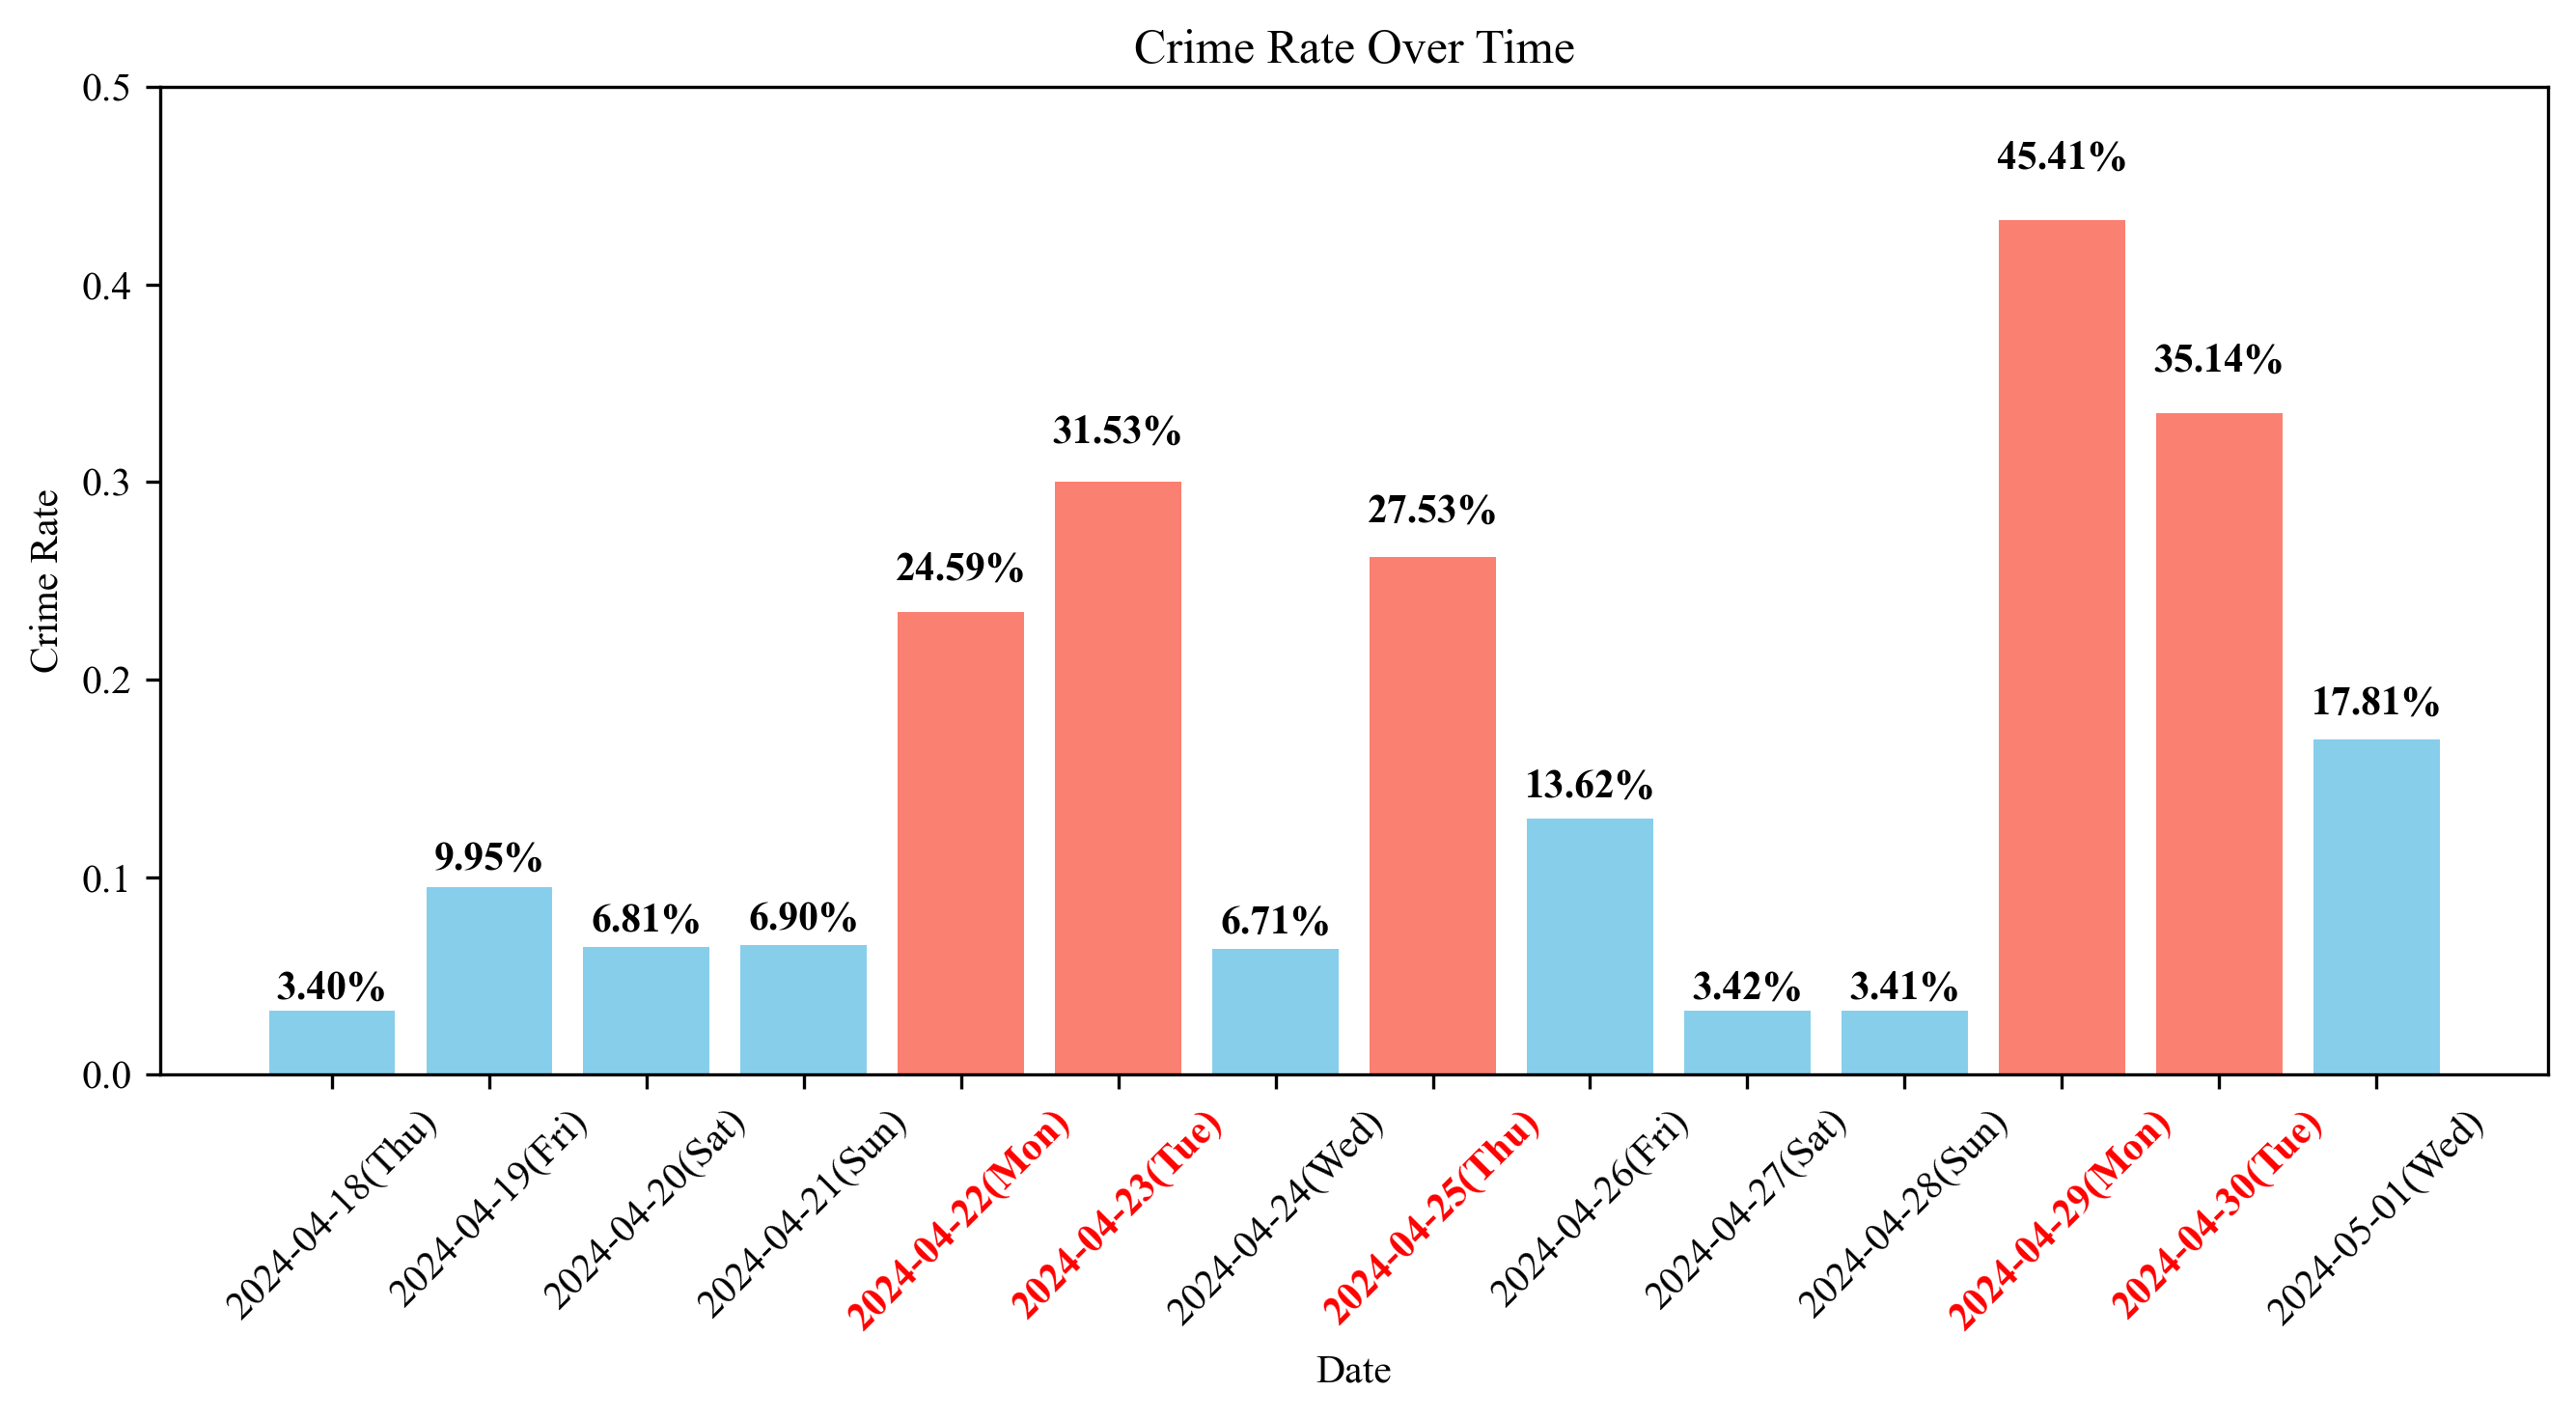

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib.font_manager import FontProperties

mpl.rc('font', family='Times New Roman')
plt.rcParams['figure.dpi'] = 300

# Define the crime rates
crime_rates = list(probabilities_rounded[:,1])

# Define the date range
date_range = pd.date_range(start='2024-04-18', end='2024-05-01')

# Create a DataFrame with date index
df = pd.DataFrame({'Date': date_range, 'Crime Rate': crime_rates})
df.set_index('Date', inplace=True)

# Finding the top N highest crime rates
top_n = 5
top_crimes = df.nlargest(top_n, 'Crime Rate')

# Plotting
plt.figure(figsize=(9, 5))

bars = plt.bar(df.index, df['Crime Rate'], color='skyblue')
for bar in bars:
    height = bar.get_height() * 1.05
    plt.text(bar.get_x() + bar.get_width() / 2, height, '{:.2%}'.format(height),
             ha='center', va='bottom', color='black', fontsize=10, weight='bold')


plt.bar(df.index, df['Crime Rate'], color='skyblue')
plt.bar(top_crimes.index, top_crimes['Crime Rate'], color='salmon')  # Highlighting top crimes with a different color
plt.title('Crime Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.xticks(rotation=45)

plt.xticks(df.index)
plt.ylim(0,0.50)

for tick in plt.gca().get_xticklabels():
    if tick.get_text() in top_crimes.index:
        tick.set_color('red')
        tick.set_fontproperties(FontProperties(weight='bold'))


# Add day of the week to x-axis ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d(%a)'))




plt.tight_layout()
plt.show()


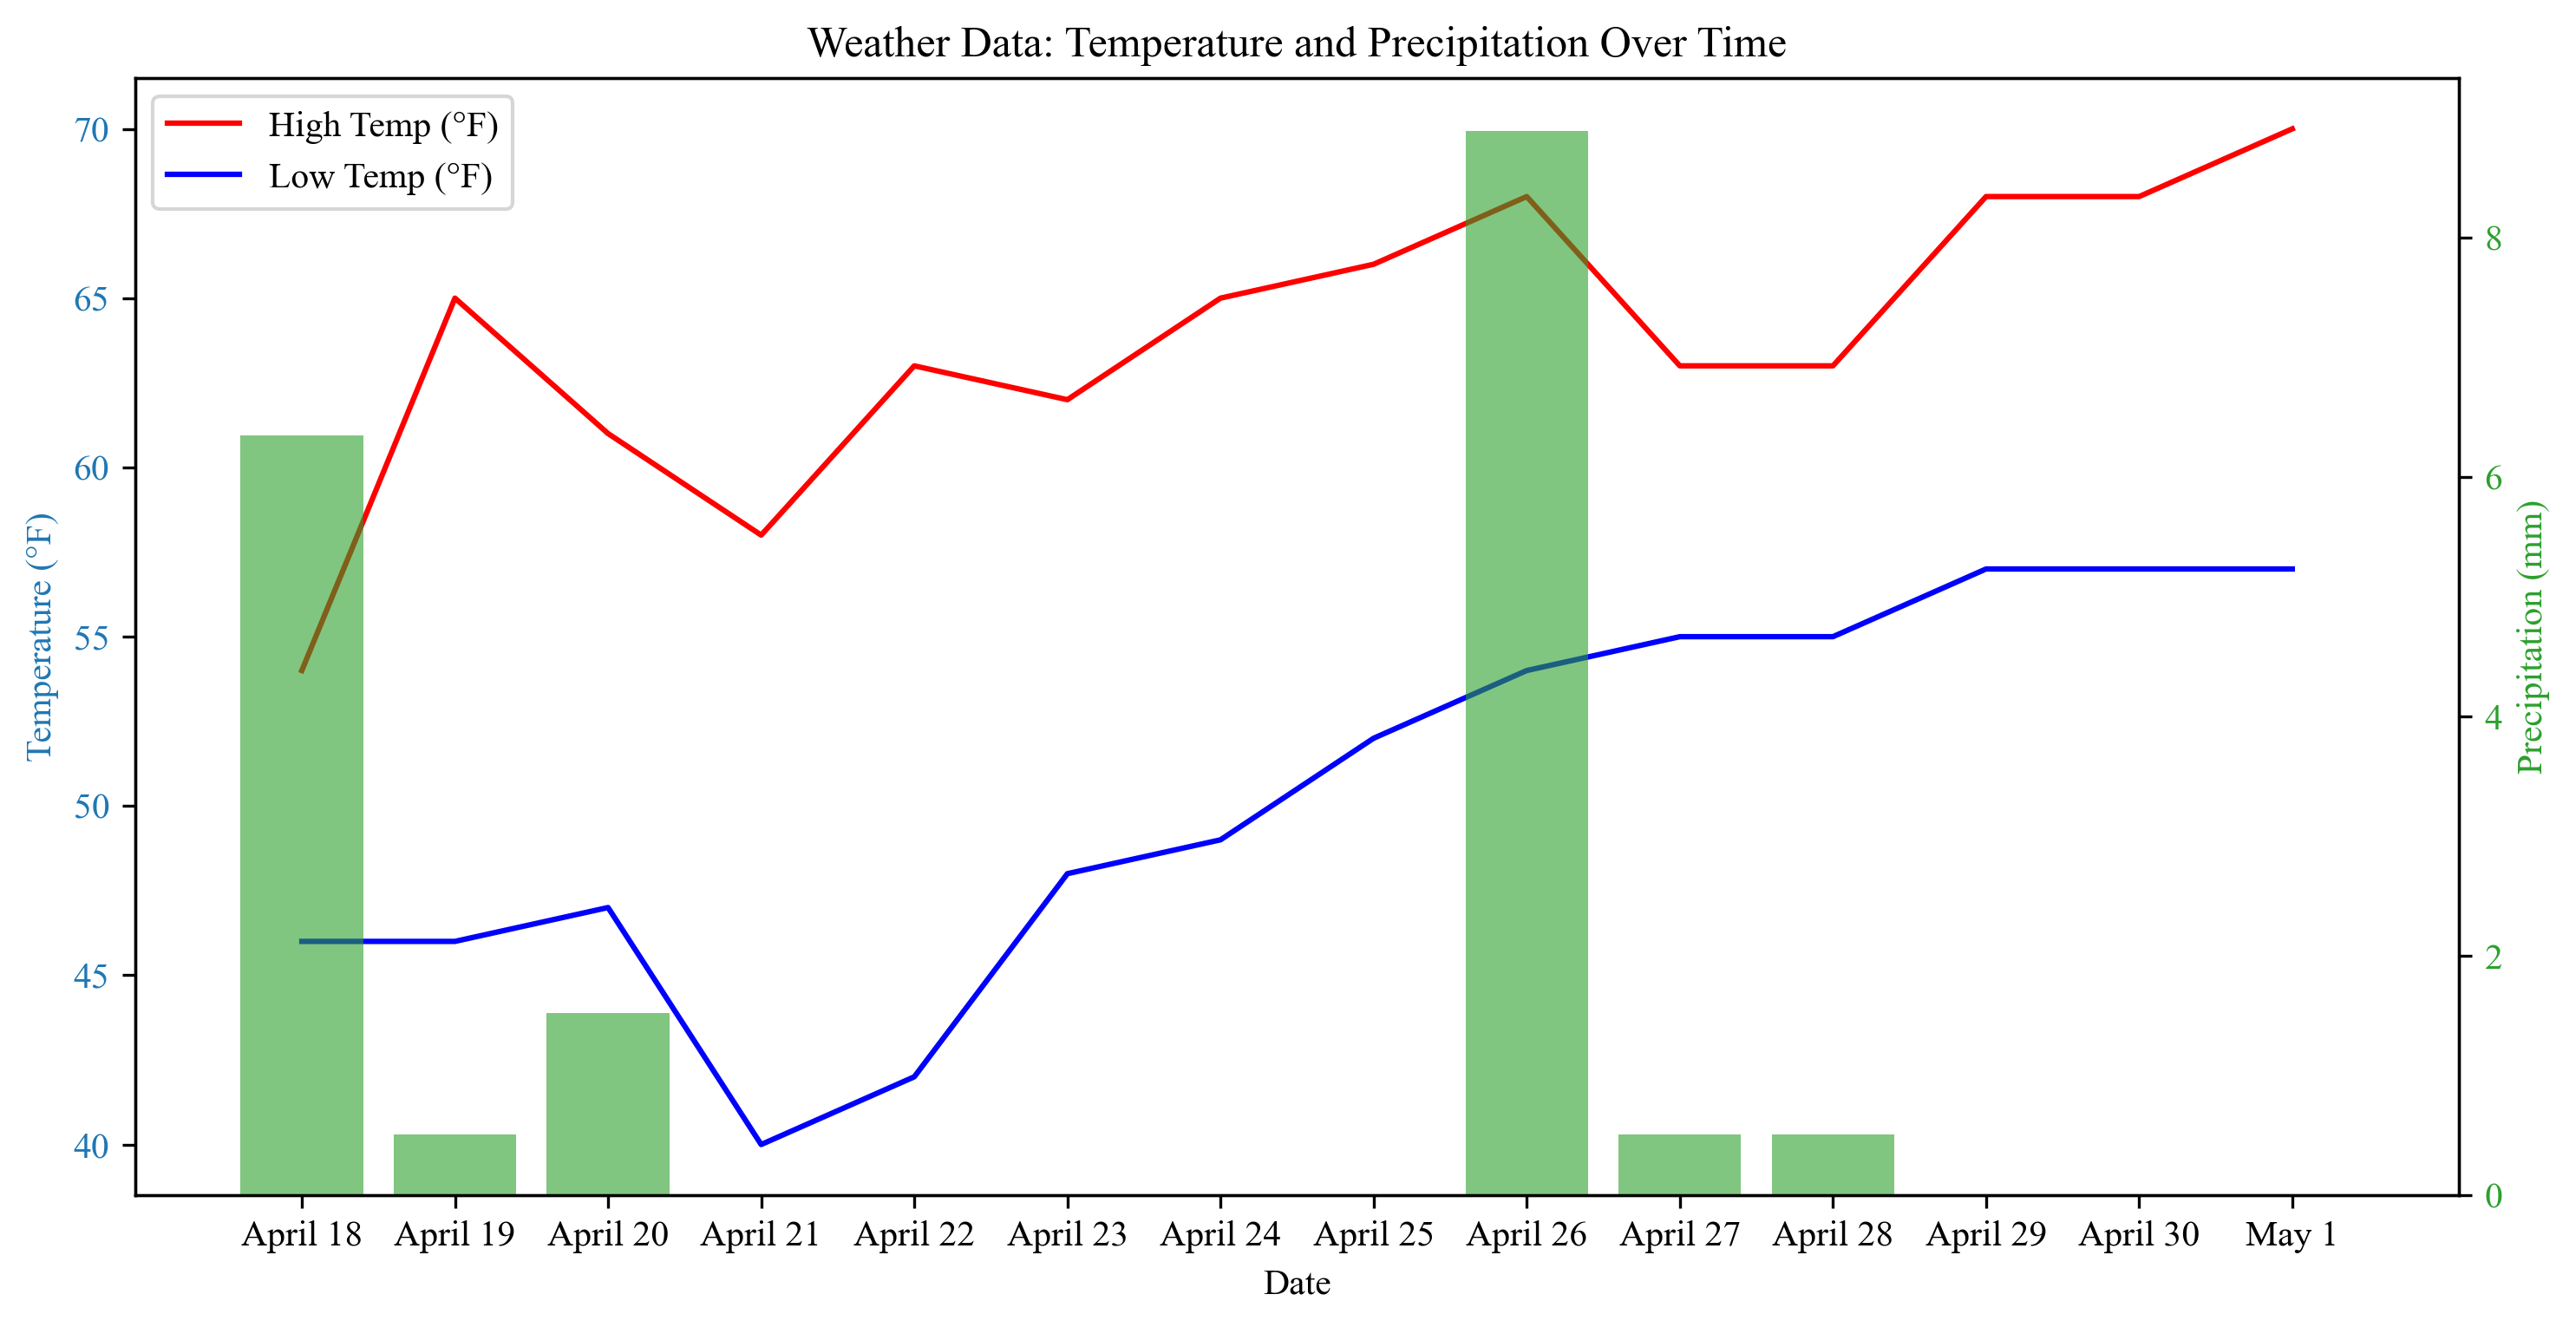

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data into a DataFrame
weather_data = {
    "Date": ["April 18", "April 19", "April 20", "April 21", "April 22", "April 23", "April 24",
             "April 25", "April 26", "April 27", "April 28", "April 29", "April 30", "May 1"],
    "High Temp (°F)": [54, 65, 61, 58, 63, 62, 65, 66, 68, 63, 63, 68, 68, 70],
    "Low Temp (°F)": [46, 46, 47, 40, 42, 48, 49, 52, 54, 55, 55, 57, 57, 57],
    "Precipitation (mm)": [6.35, 0.51, 1.52, 0.00, 0.00, 0.00, 0.00, 0.00, 8.89, 0.51, 0.51, 0.00, 0.00, 0.00]
}

df = pd.DataFrame(weather_data)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°F)', color=color)
ax1.plot(df['Date'], df['High Temp (°F)'], label='High Temp (°F)', color='r')
ax1.plot(df['Date'], df['Low Temp (°F)'], label='Low Temp (°F)', color='b')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Precipitation (mm)', color=color)  # we already handled the x-label with ax1
ax2.bar(df['Date'], df['Precipitation (mm)'], color=color, alpha=0.6)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xticks(rotation=45)
plt.title("Weather Data: Temperature and Precipitation Over Time")
plt.show()


# **Hours Prediction**

In [ ]:
ddf = pd.concat([df_weather,df_last.iloc[0:1,:]],axis=0, join='outer', ignore_index=True)
ddf = ddf.iloc[:-1,:]
ddf = ddf.fillna(0)
ddf['dc_dist_18'] = 1
ddf['psa_4'] = 1

for i in range(13):
    ddf.loc[i,'Day_'+str(i+18)] =1
    ddf.loc[i,'DayOfWeek_'+str((i+4)%7)] =1
    ddf.loc[i,'Month_4'] =1

ddf.loc[13,'Month_5'] =1
ddf.loc[13,'Day_1'] = 1

ddf = ddf.drop(columns = ['Crime','DayOfWeek_0', 'Day_1'])
ddf.to_csv('ddf.csv',index = False)
ddf

PRCP  TMAX  TMIN  dc_dist_2  dc_dist_3  dc_dist_4  dc_dist_5  \
0   0.250000  54.0  46.0        0.0        0.0        0.0        0.0   
1   0.020079  65.0  46.0        0.0        0.0        0.0        0.0   
2   0.059843  61.0  47.0        0.0        0.0        0.0        0.0   
3   0.000000  58.0  40.0        0.0        0.0        0.0        0.0   
4   0.000000  63.0  42.0        0.0        0.0        0.0        0.0   
5   0.000000  62.0  48.0        0.0        0.0        0.0        0.0   
6   0.000000  65.0  49.0        0.0        0.0        0.0        0.0   
7   0.000000  66.0  52.0        0.0        0.0        0.0        0.0   
8   0.350000  68.0  54.0        0.0        0.0        0.0        0.0   
9   0.020079  68.0  55.0        0.0        0.0        0.0        0.0   
10  0.020079  63.0  55.0        0.0        0.0        0.0        0.0   
11  0.000000  68.0  57.0        0.0        0.0        0.0        0.0   
12  0.000000  68.0  57.0        0.0        0.0        0.0        0.0   
13  0.000000  70.0  57.0        0.0        0.0        0.0        0.0   

    dc_dist_6  dc_dist_7  dc_dist_8  ...  Hour_14  Hour_15  Hour_16  Hour_17  \
0         0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
1         0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
2         0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
3         0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
4         0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
5         0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
6         0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
7         0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
8         0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
9         0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
10        0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
11        0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
12        0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   
13        0.0        0.0        0.0  ...      0.0      0.0      0.0      0.0   

    Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  Hour_23  
0       0.0      0.0      0.0      0.0      0.0      0.0  
1       0.0      0.0      0.0      0.0      0.0      0.0  
2       0.0      0.0      0.0      0.0      0.0      0.0  
3       0.0      0.0      0.0      0.0      0.0      0.0  
4       0.0      0.0      0.0      0.0      0.0      0.0  
5       0.0      0.0      0.0      0.0      0.0      0.0  
6       0.0      0.0      0.0      0.0      0.0      0.0  
7       0.0      0.0      0.0      0.0      0.0      0.0  
8       0.0      0.0      0.0      0.0      0.0      0.0  
9       0.0      0.0      0.0      0.0      0.0      0.0  
10      0.0      0.0      0.0      0.0      0.0      0.0  
11      0.0      0.0      0.0      0.0      0.0      0.0  
12      0.0      0.0      0.0      0.0      0.0      0.0  
13      0.0      0.0      0.0      0.0      0.0      0.0  

[14 rows x 102 columns]

In [ ]:
# Re-load the original CSV file
original_data = ddf

# Function to expand each row into 24 rows, one for each hour, with dummy variables
def expand_to_hourly(df):
    # Create a list to hold the new rows
    new_rows = []

    # Iterate over each row in the DataFrame
    for _, row in df.iterrows():
        # For each hour, create a new row with the original data
        for hour in range(1, 25):
            new_row = row.copy()
            # Set the 'Hour_x' column to 1 and others to 0
            for h in range(1, 25):
                new_row[f'Hour_{h}'] = 1 if h == hour else 0
            new_rows.append(new_row)

    # Combine all the new rows into a DataFrame
    hourly_df = pd.DataFrame(new_rows)
    return hourly_df

# Apply the function to the original dataframe
hourly_data = expand_to_hourly(original_data)

# Save the expanded hourly data to a new CSV file
hourly_data


PRCP  TMAX  TMIN  dc_dist_2  dc_dist_3  dc_dist_4  dc_dist_5  dc_dist_6  \
0   0.25  54.0  46.0        0.0        0.0        0.0        0.0        0.0   
0   0.25  54.0  46.0        0.0        0.0        0.0        0.0        0.0   
0   0.25  54.0  46.0        0.0        0.0        0.0        0.0        0.0   
0   0.25  54.0  46.0        0.0        0.0        0.0        0.0        0.0   
0   0.25  54.0  46.0        0.0        0.0        0.0        0.0        0.0   
..   ...   ...   ...        ...        ...        ...        ...        ...   
13  0.00  70.0  57.0        0.0        0.0        0.0        0.0        0.0   
13  0.00  70.0  57.0        0.0        0.0        0.0        0.0        0.0   
13  0.00  70.0  57.0        0.0        0.0        0.0        0.0        0.0   
13  0.00  70.0  57.0        0.0        0.0        0.0        0.0        0.0   
13  0.00  70.0  57.0        0.0        0.0        0.0        0.0        0.0   

    dc_dist_7  dc_dist_8  ...  Hour_15  Hour_16  Hour_17  Hour_18  Hour_19  \
0         0.0        0.0  ...      0.0      0.0      0.0      0.0      0.0   
0         0.0        0.0  ...      0.0      0.0      0.0      0.0      0.0   
0         0.0        0.0  ...      0.0      0.0      0.0      0.0      0.0   
0         0.0        0.0  ...      0.0      0.0      0.0      0.0      0.0   
0         0.0        0.0  ...      0.0      0.0      0.0      0.0      0.0   
..        ...        ...  ...      ...      ...      ...      ...      ...   
13        0.0        0.0  ...      0.0      0.0      0.0      0.0      0.0   
13        0.0        0.0  ...      0.0      0.0      0.0      0.0      0.0   
13        0.0        0.0  ...      0.0      0.0      0.0      0.0      0.0   
13        0.0        0.0  ...      0.0      0.0      0.0      0.0      0.0   
13        0.0        0.0  ...      0.0      0.0      0.0      0.0      0.0   

    Hour_20  Hour_21  Hour_22  Hour_23  Hour_24  
0       0.0      0.0      0.0      0.0      0.0  
0       0.0      0.0      0.0      0.0      0.0  
0       0.0      0.0      0.0      0.0      0.0  
0       0.0      0.0      0.0      0.0      0.0  
0       0.0      0.0      0.0      0.0      0.0  
..      ...      ...      ...      ...      ...  
13      1.0      0.0      0.0      0.0      0.0  
13      0.0      1.0      0.0      0.0      0.0  
13      0.0      0.0      1.0      0.0      0.0  
13      0.0      0.0      0.0      1.0      0.0  
13      0.0      0.0      0.0      0.0      1.0  

[336 rows x 103 columns]

In [ ]:
probabilities = knn_model.predict_proba(hourly_data.drop(columns = 'Hour_24'))

probabilities_rounded = np.round(probabilities, 4)

print(probabilities_rounded[:,1])
probabilities_rounded[:,1].shape

[0.1319 0.032  0.0997 0.0653 0.098  0.0647 0.0974 0.     0.0651 0.0652
 0.0688 0.0975 0.0981 0.0978 0.0996 0.131  0.1966 0.1304 0.0967 0.1651
 0.1646 0.1307 0.1316 0.0658 0.1995 0.2036 0.2337 0.166  0.1335 0.1652
 0.1644 0.1663 0.1397 0.135  0.1648 0.134  0.101  0.2317 0.2285 0.1641
 0.2004 0.1323 0.2013 0.2704 0.1995 0.2695 0.1354 0.1359 0.0642 0.0974
 0.0984 0.0675 0.0978 0.0972 0.1327 0.0991 0.0656 0.1007 0.1326 0.1629
 0.1293 0.0654 0.1658 0.0976 0.0662 0.1311 0.1334 0.2666 0.1631 0.1582
 0.1977 0.0663 0.1666 0.0346 0.0327 0.0973 0.1339 0.0328 0.0651 0.068
 0.0651 0.0326 0.0329 0.096  0.0977 0.1636 0.1    0.1319 0.1651 0.1328
 0.1332 0.1339 0.1983 0.0976 0.1663 0.1598 0.4325 0.4008 0.4334 0.4348
 0.3309 0.3654 0.4645 0.3964 0.4303 0.3669 0.468  0.4022 0.331  0.2689
 0.3631 0.399  0.4335 0.3349 0.4384 0.5352 0.3343 0.4718 0.5002 0.4999
 0.5038 0.3918 0.4663 0.4346 0.3346 0.5002 0.4281 0.3957 0.4337 0.4641
 0.4622 0.4276 0.4634 0.4702 0.5002 0.503  0.3988 0.5714 0.4593 0.4988
 0.2978

(336,)

In [ ]:
date_range = pd.date_range(start='2024-04-18 01:00:00', end='2024-05-02', freq='H')
date_range

DatetimeIndex(['2024-04-18 01:00:00', '2024-04-18 02:00:00',
               '2024-04-18 03:00:00', '2024-04-18 04:00:00',
               '2024-04-18 05:00:00', '2024-04-18 06:00:00',
               '2024-04-18 07:00:00', '2024-04-18 08:00:00',
               '2024-04-18 09:00:00', '2024-04-18 10:00:00',
               ...
               '2024-05-01 15:00:00', '2024-05-01 16:00:00',
               '2024-05-01 17:00:00', '2024-05-01 18:00:00',
               '2024-05-01 19:00:00', '2024-05-01 20:00:00',
               '2024-05-01 21:00:00', '2024-05-01 22:00:00',
               '2024-05-01 23:00:00', '2024-05-02 00:00:00'],
              dtype='datetime64[ns]', length=336, freq='H')

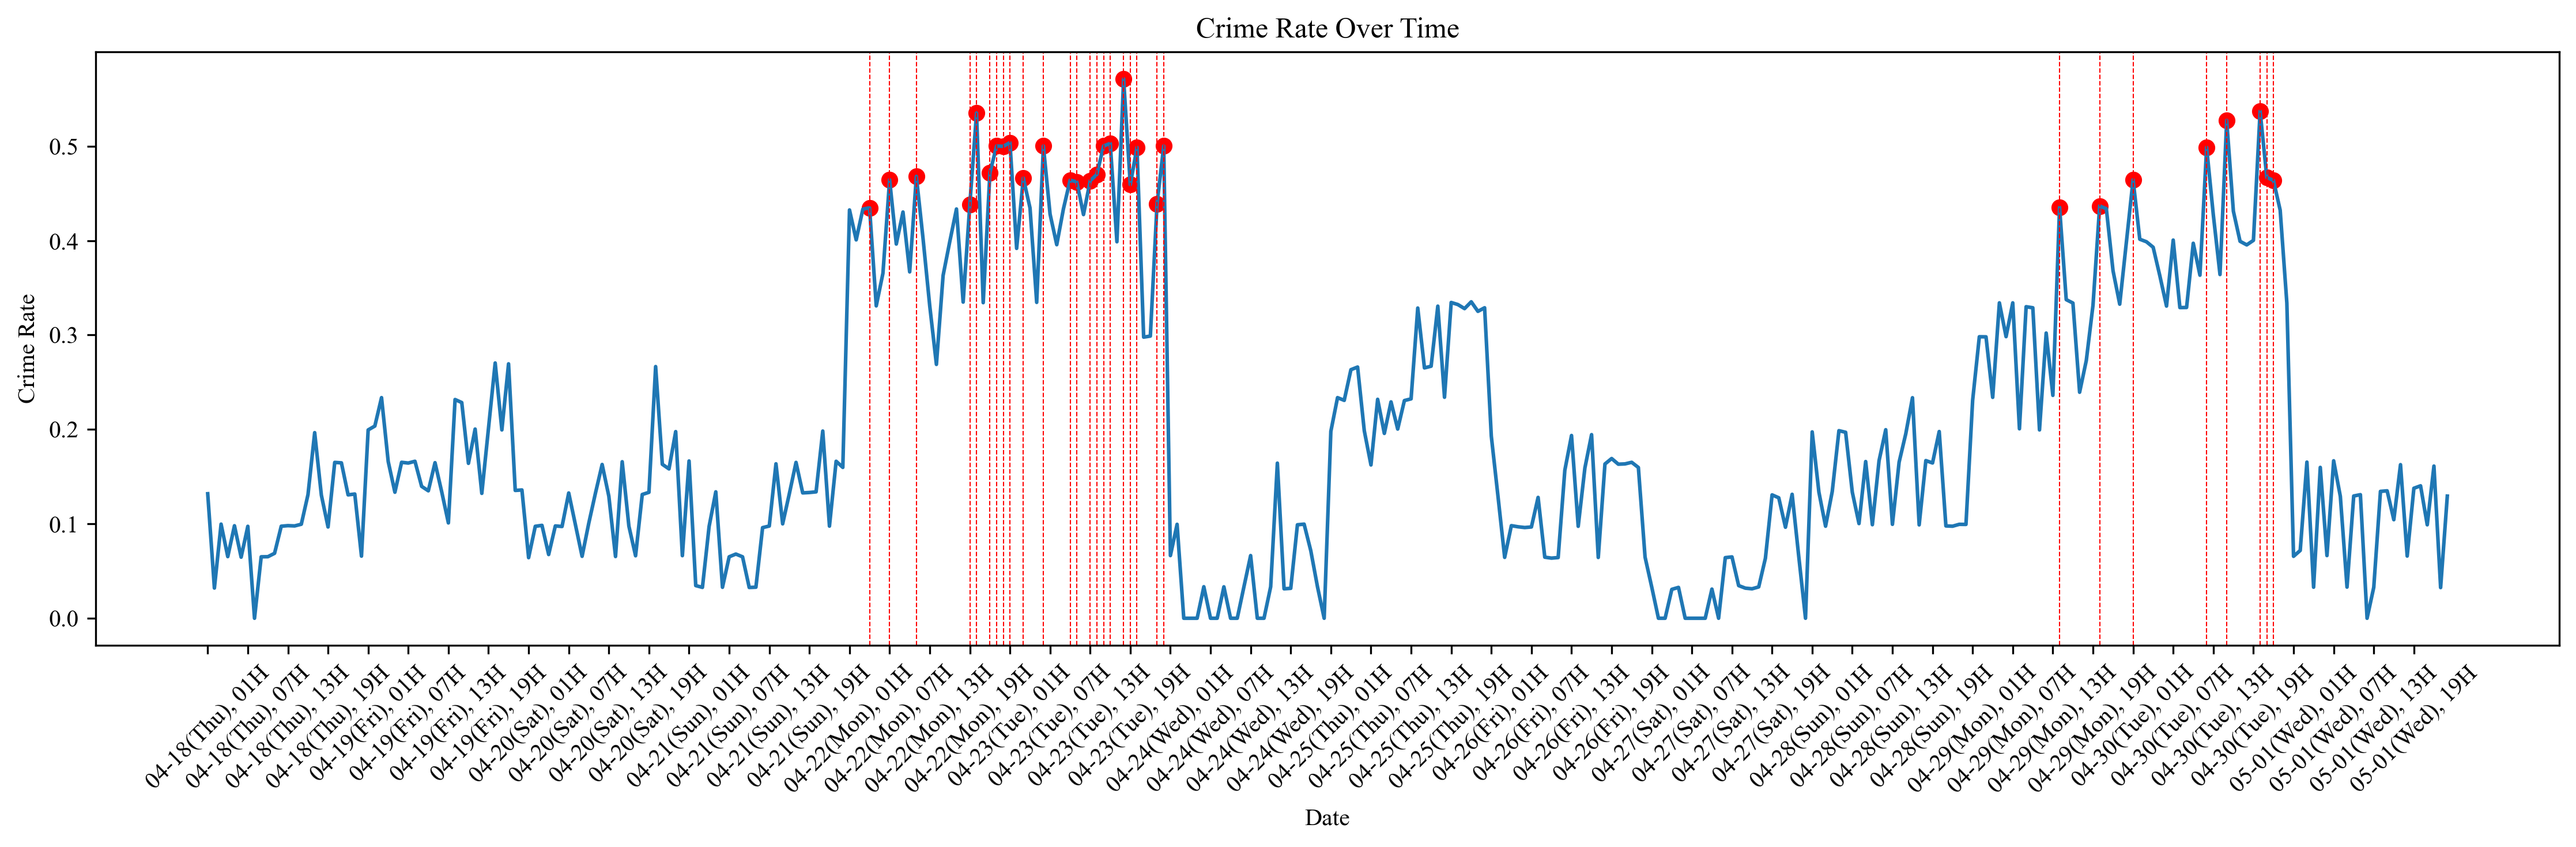

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(date_range,probabilities_rounded[:,1])

plt.title('Crime Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.xticks(rotation=45)

date_range2 = pd.date_range(start='2024-04-18 01:00:00', end='2024-05-02', freq='6H')
plt.xticks(date_range2)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d(%a), %HH'))

top_30_idx = np.argsort(probabilities_rounded[:, 1])[-30:]  # 获取最高的30个索引
plt.scatter(date_range[top_30_idx], probabilities_rounded[top_30_idx, 1], color='red')  # 红色标记这些点
# 标红犯罪率最高的日期
for date in date_range[top_30_idx]:
    plt.axvline(x=date, color='red', linestyle='--', linewidth=0.5)  # 在最高点的日期添加红色虚线



plt.tight_layout()
plt.show()

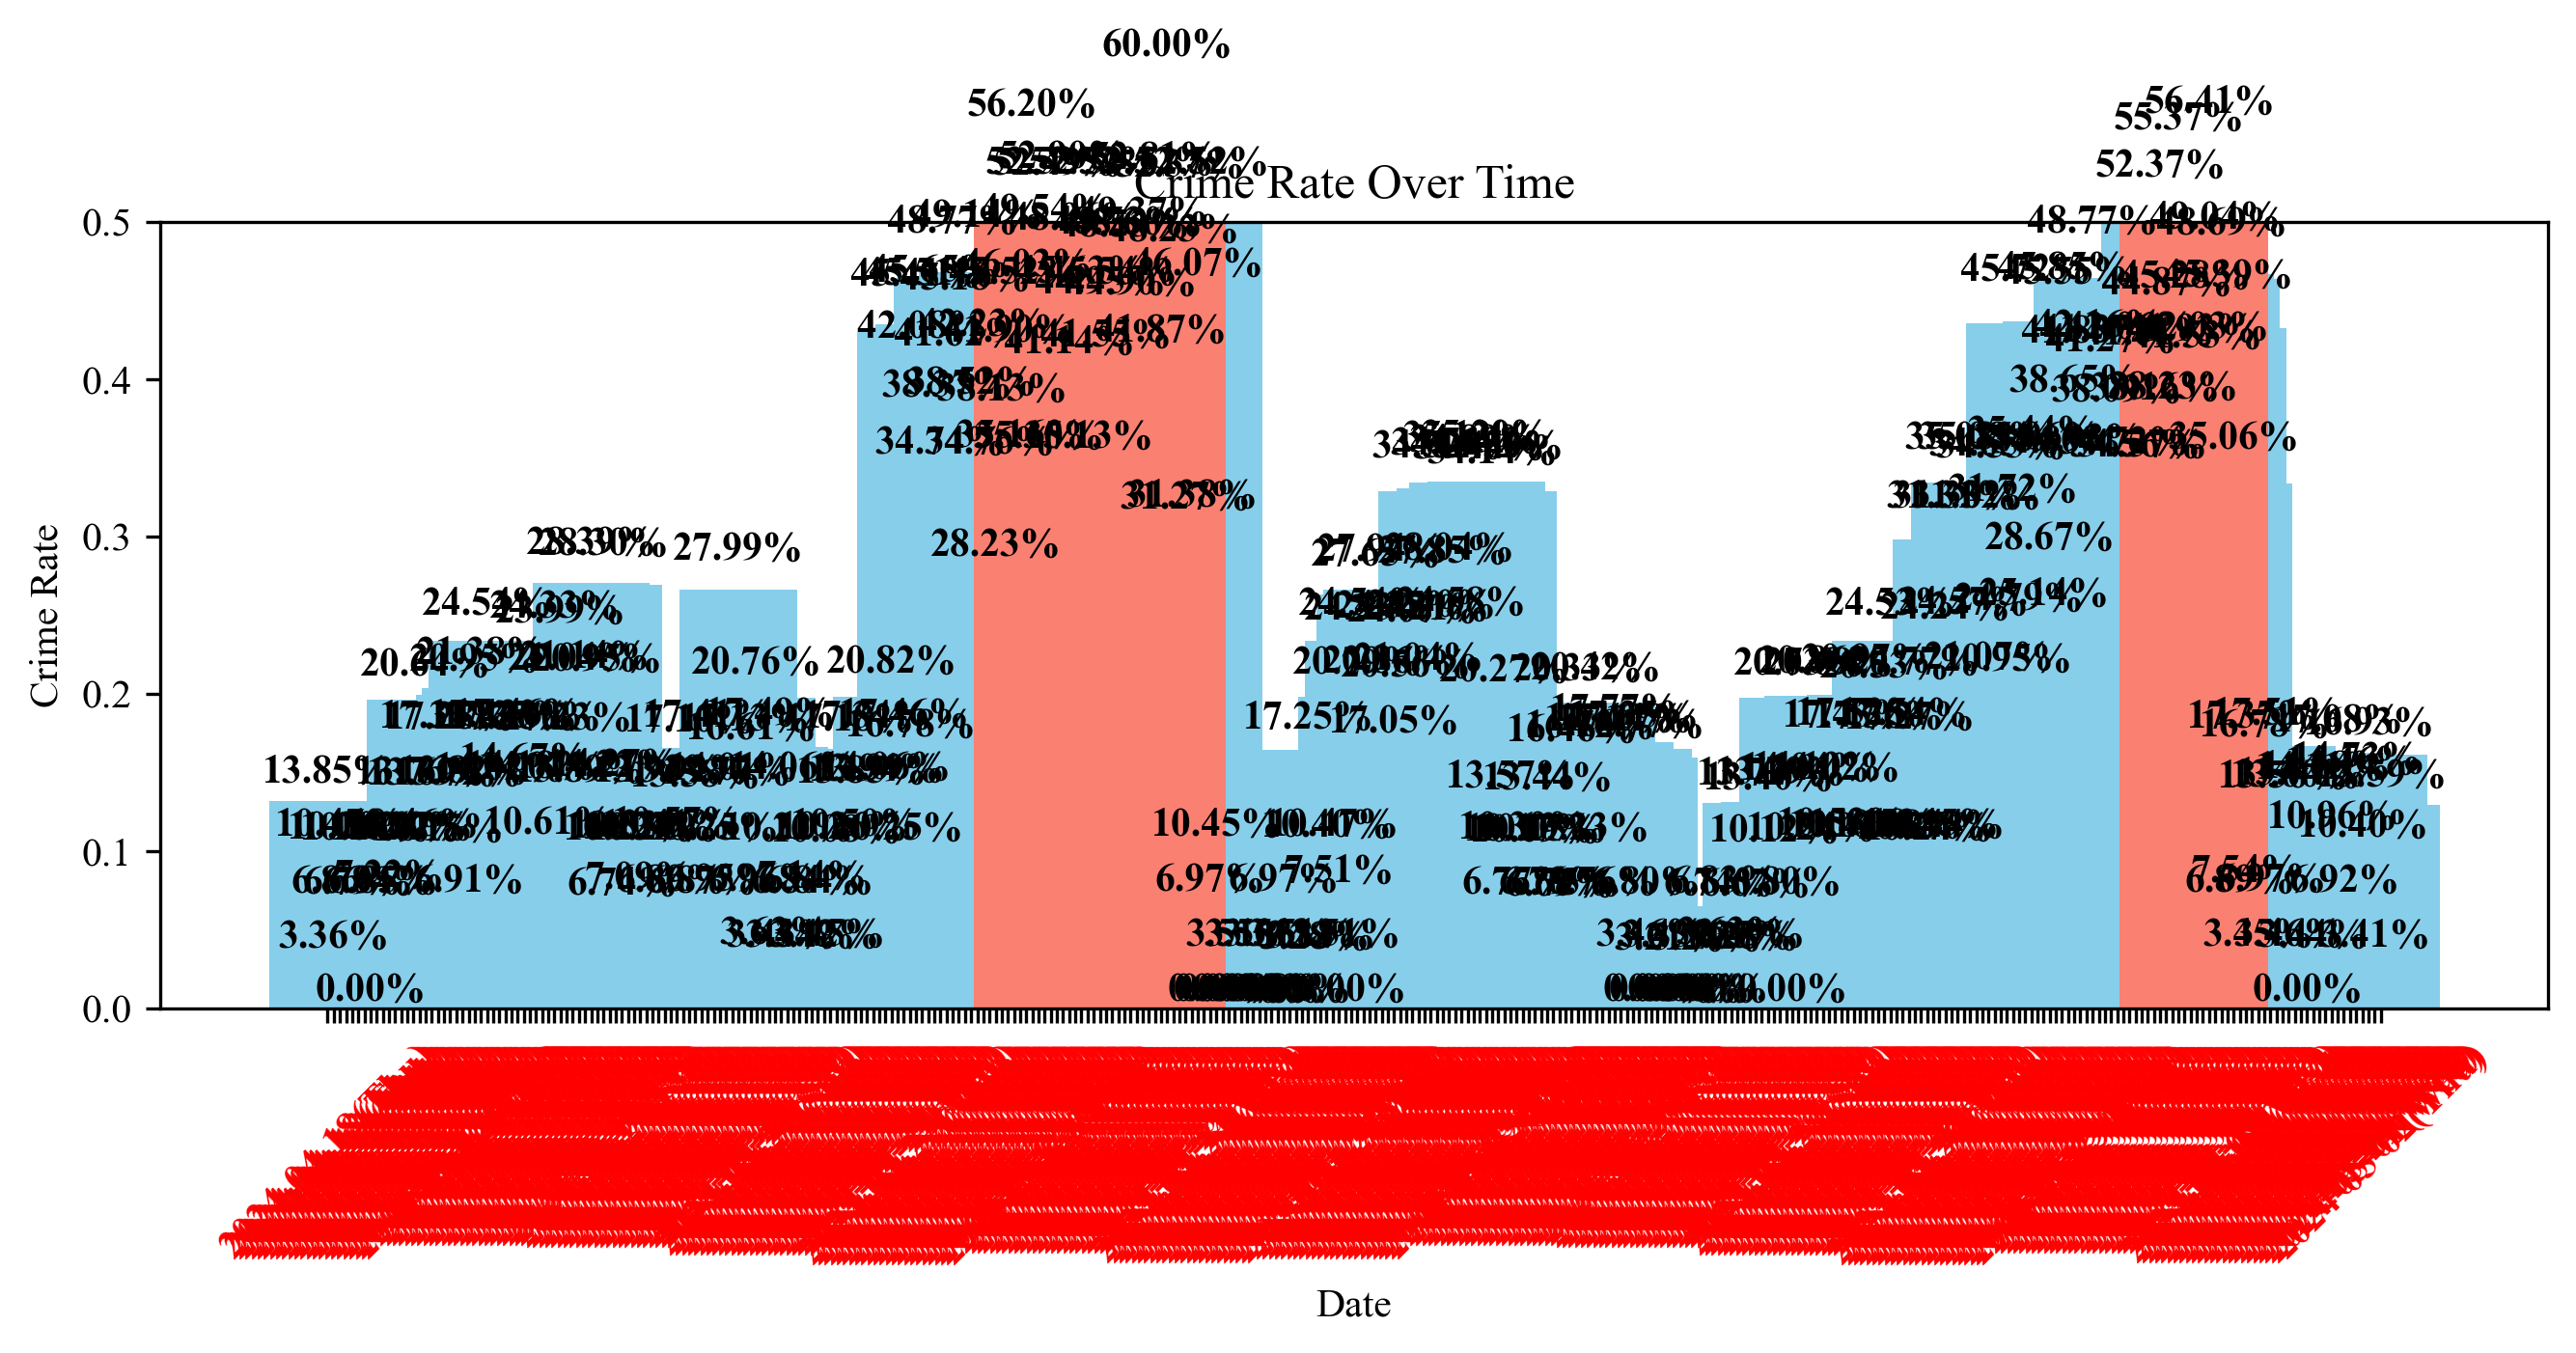

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib.font_manager import FontProperties

mpl.rc('font', family='Times New Roman')
plt.rcParams['figure.dpi'] = 300

# Define the crime rates
crime_rates = list(probabilities_rounded[:,1])

# Define the date range
date_range = pd.date_range(start='2024-04-18 01:00:00', end='2024-05-02', freq='H')

# Create a DataFrame with date index
df = pd.DataFrame({'Date': date_range, 'Crime Rate': crime_rates})
df.set_index('Date', inplace=True)

# Finding the top N highest crime rates
top_n = 5
top_crimes = df.nlargest(top_n, 'Crime Rate')

# Plotting
plt.figure(figsize=(9, 5))

bars = plt.bar(df.index, df['Crime Rate'], color='skyblue')
for bar in bars:
    height = bar.get_height() * 1.05
    plt.text(bar.get_x() + bar.get_width() / 2, height, '{:.2%}'.format(height),
             ha='center', va='bottom', color='black', fontsize=10, weight='bold')


plt.bar(df.index, df['Crime Rate'], color='skyblue')
plt.bar(top_crimes.index, top_crimes['Crime Rate'], color='salmon')  # Highlighting top crimes with a different color
plt.title('Crime Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.xticks(rotation=45)

plt.xticks(df.index)
plt.ylim(0,0.50)

for tick in plt.gca().get_xticklabels():
    if tick.get_text() in top_crimes.index:
        tick.set_color('red')
        tick.set_fontproperties(FontProperties(weight='bold'))


# Add day of the week to x-axis ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d(%a)'))




plt.tight_layout()
plt.show()
